<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/python_graphtheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

python で graph theory のグラフをどう描くか、試行錯誤。 実験

参考
1. sagemath での描き方 sage: g=graphs.GrotzschGraph()
1. networkx
1. matplotlib
1. PyGraphviz
1. https://qiita.com/kzm4269/items/081ff2fdb8a6b0a6112f <=qiita

1. https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
1. https://www.python-course.eu/networkx.php
1. https://igraph.org/python/doc/tutorial/tutorial.html igraph tutorial
1. plotly, pypi



networkx で作ったグラフ理論のグラフを colab (jupyter) で表示するのに

1. matplotlib の plt.show() を使う方法
2. IPython.displayのSVGとImageを使う方法
3. pygraphviz を使う方法

の 3通りあるが、3は事前に pip install が必要なので現実的でない。1 と 2 を使う。


In [5]:
import networkx as nx
nx.__version__

'2.5'

In [ ]:
# pygraphviz を使いたい場合次のようにすれば colab (jupyter) で描ける
# !apt install libgraphviz-dev
# !pip install pygraphviz
#
# としておいて別のコードセルで
#
# import pygraphviz
# import networkx as nx
# from IPython.display import Image
# G = nx.DiGraph()
# data_array = [1,2,3,4,5,6,7,8]
# nx.add_cycle(G, data_array)
# Image(nx.nx_agraph.view_pygraphviz(G, prog='fdp')[0])
#
# nx.nx_agraph.view_pygraphviz(G, prog='fdp') の結果が (png, object) のタプルなので [0] で png を取り出している
# png の表示方法に IPython.display のt Image を使ったがもっと一般的な方法があるかもしれない

# 有向グラフ DiGraph

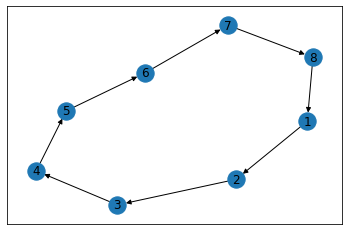

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # 有向グラフ (Directed Graph)
data_array = [1,2,3,4,5,6,7,8]

nx.add_cycle(G, data_array)

nx.draw_networkx(G)
plt.show (G)

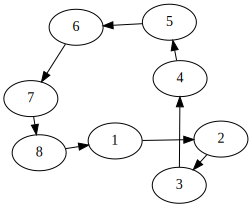

In [1]:
# 上のセルと同じものを SVG にしてから出力
import networkx as nx
from IPython.display import SVG

G = nx.DiGraph()  # 有向グラフ (Directed Graph)
data_array = [1,2,3,4,5,6,7,8]

nx.add_cycle(G, data_array)

display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

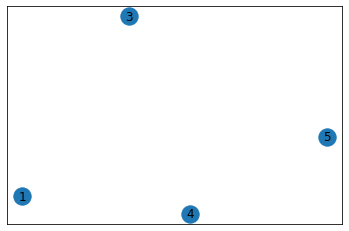

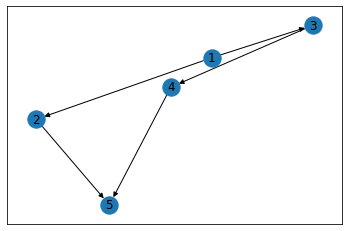

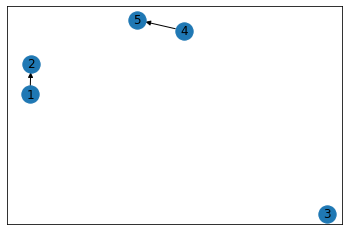

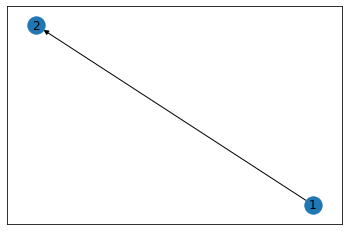

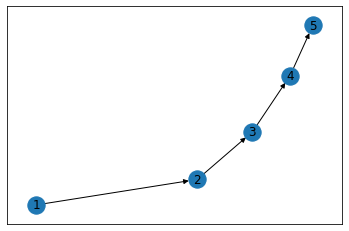

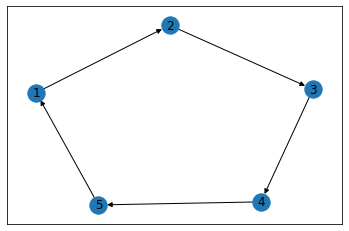

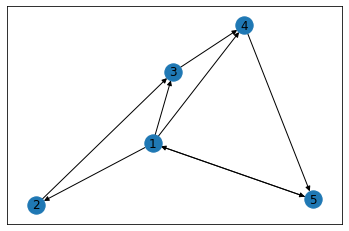

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# 頂点の追加
G.add_node(1)                
G.add_nodes_from([3, 4, 5])
plt.show (nx.draw_networkx(G))

# 辺の追加 (頂点も必要に応じて追加される)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)])
plt.show (nx.draw_networkx(G))

# 辺の削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])
plt.show (nx.draw_networkx(G))

# 頂点の削除 (削除された頂点に接続されている辺も削除される)
G.remove_node(5)
G.remove_nodes_from([3, 4])
plt.show (nx.draw_networkx(G))

# 指定したパス上の頂点と辺を追加
nx.add_path(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5
plt.show (nx.draw_networkx(G))

# 指定した閉路上の頂点と辺を追加
nx.add_cycle(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1
plt.show (nx.draw_networkx(G))

# 放射状に頂点と辺を追加
nx.add_star(G, [1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5
plt.show (nx.draw_networkx(G))


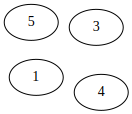

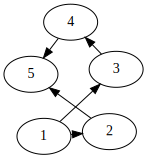

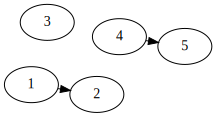

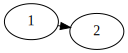

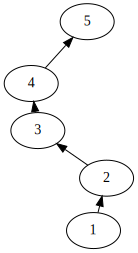

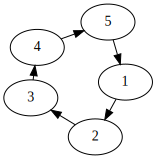

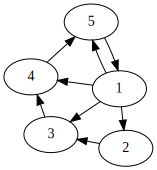

In [16]:
# 同じものを SVG 出力
import networkx as nx
from IPython.display import SVG

G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# 頂点の追加
G.add_node(1)                
G.add_nodes_from([3, 4, 5])
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# 辺の追加 (頂点も必要に応じて追加される)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)])
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# 辺の削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# 頂点の削除 (削除された頂点に接続されている辺も削除される)
G.remove_node(5)
G.remove_nodes_from([3, 4])
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# 指定したパス上の頂点と辺を追加
nx.add_path(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# 指定した閉路上の頂点と辺を追加
nx.add_cycle(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# 放射状に頂点と辺を追加
nx.add_star(G, [1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5
display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))


以上より、plt.show() で描くのと、display(SVG())で描くのは見かけだけの違いのようである。

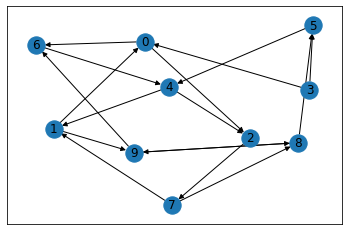

In [13]:
# 実験
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.draw_networkx(G)
plt.show()

In [32]:
# 実験
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# G.nodes[頂点][属性キー] = 属性値
G.nodes[1]['a'] = 'Alice'

# G.edges[辺][属性キー] = 属性値
G.edges[1, 2]['b'] = 'Bob'

# G.succ[始点][終点][属性キー] = 属性値
G.succ[2][3]['c'] = 'Carol'

# G.pred[終点][始点][属性キー] = 属性値
G.pred[3][1]['d'] = 'Dave'

print(dict(G.nodes))
# {1: {'a': 'Alice'}, 2: {}, 3: {}}

print(dict(G.edges))
# {(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}

print(G.succ)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

print(G.pred)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

{1: {'a': 'Alice'}, 2: {}, 3: {}}
{(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
{1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
{1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}
